In [1]:
from tensorflow.keras.layers import (Dense,Input,Conv1D,Dropout,LSTM,Bidirectional,GRU,SpatialDropout1D,Embedding,Activation,concatenate,AveragePooling1D,
                                    MaxPooling1D,BatchNormalization,GlobalMaxPooling1D,GlobalAveragePooling1D,add,PReLU,Flatten,TimeDistributed,Reshape)
from tensorflow.keras import regularizers
from tensorflow import reshape
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import gc
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stanford-covid-vaccine/test.json
/kaggle/input/stanford-covid-vaccine/train.json
/kaggle/input/stanford-covid-vaccine/sample_submission.csv
/kaggle/input/stanford-covid-vaccine/bpps/id_d6986f624.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_1f3bbe239.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_37304d07b.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_e1a1e4834.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_0ff370c27.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_f6502a1ff.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_2d1bc6cb8.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_5589aab12.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_eb309f225.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_98452df6b.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_f5f025500.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_522022b1a.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_e0456b8b0.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_e0ea9f170.npy
/kaggle/input/stanfo

/kaggle/input/stanford-covid-vaccine/bpps/id_200e26389.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_41c7b72ed.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_1e12f72c3.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_ccba0c924.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_459a0aa1c.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_5aa453797.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_e7903d604.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_a35cc6480.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_621f728eb.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_d8494b4e5.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_3a037ef16.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_e27beac77.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_0211b293a.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_f999a54f5.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_17f2cedf2.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_bf6945761.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_9d8cfc8af.n

/kaggle/input/stanford-covid-vaccine/bpps/id_a410242e1.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_93c3a613e.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_83b647eb1.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_e73c58b1e.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_edc04583a.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_e3d68a577.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_c8dbd756f.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_112b61222.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_4419996c3.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_9085aafc1.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_e36ae70c4.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_00cd52aa9.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_ac9cd1bb9.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_f444474b3.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_4eca06da6.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_9a0520b5a.npy
/kaggle/input/stanford-covid-vaccine/bpps/id_75b58ad28.n

In [2]:
def seed_everything(seed = 34):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    
seed_everything()

In [3]:
train=pd.read_json('/kaggle/input/stanford-covid-vaccine/train.json',lines=True).drop('index',axis=1)
test=pd.read_json('/kaggle/input/stanford-covid-vaccine/test.json',lines=True).drop('index',axis=1)
sample_sub=pd.read_csv('/kaggle/input/stanford-covid-vaccine/sample_submission.csv')

In [4]:
targets = ['reactivity','deg_Mg_pH10','deg_pH10','deg_Mg_50C', 'deg_50C']

In [5]:
train

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,id_ff84602f7,GGAAAAUAGCAGAGGAAAUACUAGAGCAAUUGCAAAGGCCGAUCAU...,........((..((......))...)).........(((..........,EEEEEEEESSIISSHHHHHHSSIIISSXXXXXXXXXSSSHHHHHHH...,4.036,1,107,68,"[0.2585, 0.297100

In [6]:
def read_bpps_sum(df):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps_arr.append(np.load(f"../input/stanford-covid-vaccine/bpps/{mol_id}.npy").sum(axis=1))
    return bpps_arr

def read_bpps_max(df):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps_arr.append(np.load(f"../input/stanford-covid-vaccine/bpps/{mol_id}.npy").max(axis=1))
    return bpps_arr

def read_bpps_nb(df):
    #mean and std from https://www.kaggle.com/symyksr/openvaccine-deepergcn 
    bpps_nb_mean = 0.077522
    bpps_nb_std = 0.08914
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps = np.load(f"../input/stanford-covid-vaccine/bpps/{mol_id}.npy")
        bpps_nb = (bpps > 0).sum(axis=0) / bpps.shape[0]
        bpps_nb = (bpps_nb - bpps_nb_mean) / bpps_nb_std
        bpps_arr.append(bpps_nb)
    return bpps_arr 

train['bpps_sum'] = read_bpps_sum(train)
test['bpps_sum'] = read_bpps_sum(test)
train['bpps_max'] = read_bpps_max(train)
test['bpps_max'] = read_bpps_max(test)
train['bpps_nb'] = read_bpps_nb(train)
test['bpps_nb'] = read_bpps_nb(test)

#sanity check
train.head()

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,...,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,bpps_sum,bpps_max,bpps_nb
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...",...,"[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000...","[0.19854229, 0.18371220000000002, 0.0600024000...","[0.0217857, 0.0386527, 0.0275904, 0.00947066, ...","[2.0659663786252436, 1.2272143577570933, -0.34..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...",...,"[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.16883627604054915, 0.10675940059456464, 0.0...","[0.11931483477784201, 0.0808186531761711, 0.06...","[0.49330633949746183, 0.49330633949746183, -0...."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...",...,"[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499...","[0.06680724164624499, 0.04433748694733778, 0.0...","[0.017340043515196805, 0.00826566577930985, 0....","[2.275654383842281, 2.5901863916678374, 0.8078..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...",...,"[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.22702912000000003, 0.18439387000000002, 0.0...","[0.0350158, 0.0332295, 0.00272567, 0.0, 0.0, 0...","[0.5981503421059805, 0.9126823499315369, -0.65..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...",...,"[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 

In [7]:
def one_hot_char(s,enum={c : i for i, c in enumerate('ACGUBEHIMSX.()')}):
    one_hot_s = []
    for i in range(len(s)):
        one_hot_c=np.zeros(len(enum))
        one_hot_c[enum[s[i]]] = 1
        one_hot_s.append(one_hot_c)
    return one_hot_s

one_hot_char("GAAAGCUAGGACGUGG")

[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.

def decode_one_hot(arr, enum={c : i for i, c in enumerate('ACGUBEHIMSX.()')}):
    s=[]
    inv_enum= { i : c for c, i in enum.iteritems()}
    for i in range(len(arr)):
        s+=inv_enum
                        

In [8]:
textencoding={c : i for i, c in enumerate('ACGUBEHIMSX.()')}
textencoding

{'A': 0,
 'C': 1,
 'G': 2,
 'U': 3,
 'B': 4,
 'E': 5,
 'H': 6,
 'I': 7,
 'M': 8,
 'S': 9,
 'X': 10,
 '.': 11,
 '(': 12,
 ')': 13}

In [9]:
def preprocess_inputs(df, cols=['sequence', 'structure', 'predicted_loop_type']):
    return np.transpose(
        np.array(
            df[cols]
            .applymap(lambda seq: [textencoding[x] for x in seq])
            .values
            .tolist()
        ),
        (0, 2, 1)
    )

In [10]:
def denoise(df,tresh=0.25):
    df=df[df['signal_noise' > tresh]]

In [11]:
train_inputs = preprocess_inputs(train)
train_labels = np.array(train[targets].values.tolist()).transpose((0, 2, 1))

In [12]:
train_inputs.shape

(2400, 107, 3)

In [13]:
from tensorflow import keras
import keras.backend as K

def rmse(y_actual, y_pred):
    mse = keras.losses.mean_squared_error(y_actual, y_pred)
    return K.sqrt(mse)

def mcrmse(y_actual, y_pred, num_scored=len(targets)):
    score = 0
    for i in range(num_scored):
        score += rmse(y_actual[:, :, i], y_pred[:, :, i]) / num_scored
    return score

In [14]:
def build_model(one_hot = False, conv_bias_reg = regularizers.l2(0.00001), conv_kern_reg = regularizers.l2(0.00001), 
                embed = 120, lstm=100, dropout=0.3, opt='adam', input_length=68, seq_len=107, pred_len=68):
 
    
    inputs = Input((seq_len, 3))
    emb=Embedding(len(textencoding), embed, input_length=input_length, trainable=True)(inputs)
    
    reshaped = reshape(emb, shape=(-1, emb.shape[1],  emb.shape[2] * emb.shape[3]))  
    
    dropout_layer=SpatialDropout1D(0.2)(reshaped)

    conv_1=Conv1D(512, 3,padding='same',kernel_initializer='he_uniform',
                 kernel_regularizer=conv_kern_reg, bias_regularizer=conv_bias_reg) (dropout_layer)
    batch_1=BatchNormalization()(conv_1)
    act_1=Activation('relu')(batch_1) 
    max_pool_1=MaxPooling1D(pool_size=2,strides=1,padding='same') (act_1)

        
    lstm_1 = Bidirectional(LSTM(lstm, return_sequences=True, dropout=dropout, kernel_initializer='orthogonal'))(act_1)
    
    lstm_2 = Bidirectional(LSTM(lstm, return_sequences=True, dropout=dropout, kernel_initializer='orthogonal'))(lstm_1)
    
    lstm_3 = Bidirectional(LSTM(lstm, return_sequences=True, dropout=dropout, kernel_initializer='orthogonal'))(lstm_2)

    truncated = lstm_3[:, :pred_len]


    x=TimeDistributed(Dense(1024,activation='relu'))(truncated) 
    x=Dropout(0.3)(x)

    x=TimeDistributed(Dense(512,activation='relu'))(x)
    x=Dropout(0.3)(x) 

    x=TimeDistributed(Dense(5,activation='linear'))(x)



    model = Model(inputs=inputs, outputs=x) 
                
    model.compile(optimizer = opt, loss = mcrmse, metrics=['accuracy'])
    return model

In [15]:
model=build_model()

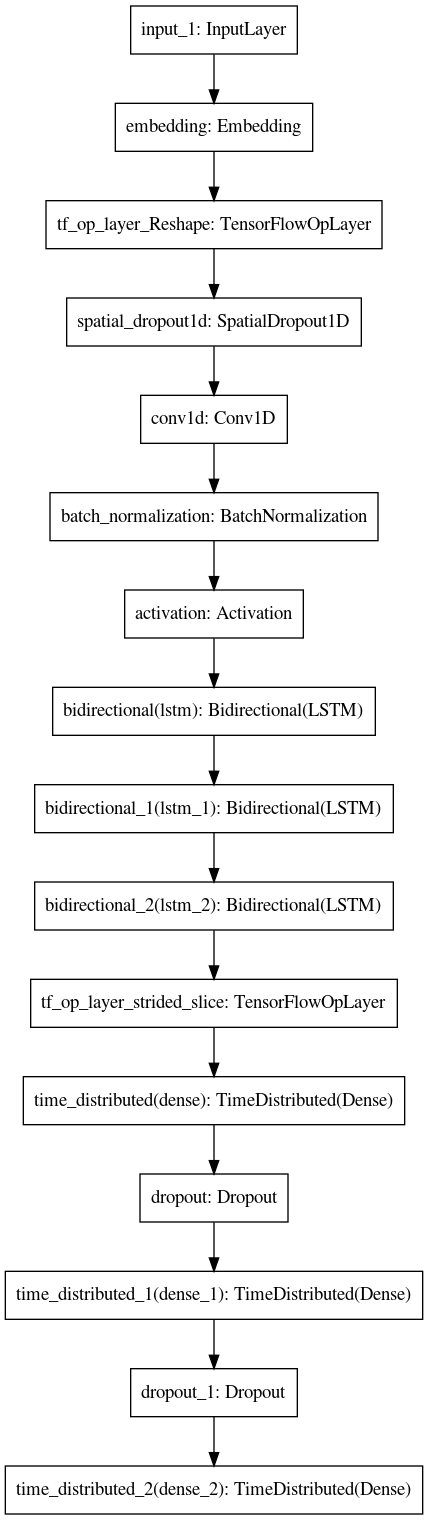

In [16]:
plot_model(model)

In [17]:
def train_and_infer( STRATIFY=True, FOLDS=4, EPOCHS=50, BATCH_SIZE=64,
                    REPEATS=3, SEED=34, VERBOSE=2):

    #get test now for OOF 
    public_df = test.query("seq_length == 107").copy()
    private_df = test.query("seq_length == 130").copy()
    private_preds = np.zeros((private_df.shape[0], 130, 5))
    public_preds = np.zeros((public_df.shape[0], 107, 5))
    public_inputs = preprocess_inputs(public_df)
    private_inputs = preprocess_inputs(private_df)

    #to evaluate TTA effects/post processing
    holdouts = []
    holdout_preds = []
    
    #to view learning curves
    histories = []
    
    #put similar RNA in the same fold
    gkf = GroupKFold(n_splits=FOLDS)
    kf=KFold(n_splits=FOLDS, random_state=SEED)
    kmeans_model = KMeans(n_clusters=200, random_state=SEED).fit(preprocess_inputs(train)[:,:,0])
    train['cluster_id'] = kmeans_model.labels_

    for _ in range(REPEATS):
        
        for f, (train_index, val_index) in enumerate((gkf if STRATIFY else kf).split(train,
                train['reactivity'], train['cluster_id'] if STRATIFY else None)):

            #define training callbacks
            lr_callback = tf.keras.callbacks.ReduceLROnPlateau(patience=8, 
                                                               factor=.1,
                                                               #min_lr=1e-5,
                                                               verbose=VERBOSE)
            save = tf.keras.callbacks.ModelCheckpoint(f'model-{f}.h5')

            #define sample weight function
            epsilon = .1
            sample_weighting = np.log1p(train.iloc[train_index]['signal_to_noise'] + epsilon) / 2

            #get train data
            trn = train.iloc[train_index]
            trn_ = preprocess_inputs(trn)
            trn_labs = np.array(trn[targets].values.tolist()).transpose((0, 2, 1))

            #get validation data
            val = train.iloc[val_index]
            val_all = preprocess_inputs(val)
            val = val[val.SN_filter == 1]
            val_ = preprocess_inputs(val)
            val_labs = np.array(val[targets].values.tolist()).transpose((0, 2, 1))

            #pre-build models for different sequence lengths
            model = build_model()
            model_short = build_model(seq_len=107, pred_len=107)
            model_long = build_model(seq_len=130, pred_len=130)

            #train model
            history = model.fit(
                trn_, trn_labs,
                validation_data = (val_, val_labs),
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                sample_weight=sample_weighting,
                callbacks=[save, lr_callback],
                verbose=VERBOSE
            )

            histories.append(history)

            #load best models
            model.load_weights(f'model-{f}.h5')
            model_short.load_weights(f'model-{f}.h5')
            model_long.load_weights(f'model-{f}.h5')

            holdouts.append(train.iloc[val_index])
            holdout_preds.append(model.predict(val_all))

            public_preds += model_short.predict(public_inputs) / (FOLDS * REPEATS)
            private_preds += model_long.predict(private_inputs) / (FOLDS * REPEATS)
        
        del model, model_short, model_long
        
    return holdouts, holdout_preds, public_df, public_preds, private_df, private_preds, histories


In [18]:
lstm_holdouts, lstm_holdout_preds, public_df, lstm_public_preds, private_df, lstm_private_preds, lstm_histories = train_and_infer()

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Epoch 1/50
29/29 - 4s - loss: 0.3736 - accuracy: 0.2624 - val_loss: 0.4852 - val_accuracy: 0.3477
Epoch 2/50
29/29 - 2s - loss: 0.3129 - accuracy: 0.3072 - val_loss: 0.4675 - val_accuracy: 0.3605
Epoch 3/50
29/29 - 2s - loss: 0.2916 - accuracy: 0.3365 - val_loss: 0.4547 - val_accuracy: 0.3555
Epoch 4/50
29/29 - 2s - loss: 0.2773 - accuracy: 0.3546 - val_loss: 0.4331 - val_accuracy: 0.3657
Epoch 5/50
29/29 - 2s - loss: 0.2697 - accuracy: 0.3683 - val_loss: 0.4187 - val_accuracy: 0.3568
Epoch 6/50
29/29 - 2s - loss: 0.2654 - accuracy: 0.3700 - val_loss: 0.3633 - val_accuracy: 0.3725
Epoch 7/50
29/29 - 2s - loss: 0.2566 - accuracy: 0.3859 - val_loss: 0.3671 - val_accuracy: 0.3893
Epoch 8/50
29/29 - 2s - loss: 0.2524 - accuracy: 0.3913 - val_loss: 0.3383 - val_accuracy: 0.4094
Epoch 9/50
29/29 - 2s - loss: 0.2461 - accuracy: 0.3972 - val_loss: 0.3258 - val_accuracy: 0.4161
Epoch 10/50
29/29 - 2s - loss: 0.2435 - accuracy: 0.4028 - val_loss: 0.3013 - val_accuracy: 0.4259
Epoch 11/50
29/29 -

Epoch 34/50
29/29 - 2s - loss: 0.1917 - accuracy: 0.4581 - val_loss: 0.2377 - val_accuracy: 0.5045
Epoch 35/50
29/29 - 2s - loss: 0.1902 - accuracy: 0.4576 - val_loss: 0.2399 - val_accuracy: 0.4967
Epoch 36/50
29/29 - 2s - loss: 0.1891 - accuracy: 0.4592 - val_loss: 0.2388 - val_accuracy: 0.4952
Epoch 37/50
29/29 - 2s - loss: 0.1878 - accuracy: 0.4627 - val_loss: 0.2386 - val_accuracy: 0.4971
Epoch 38/50
29/29 - 2s - loss: 0.1865 - accuracy: 0.4625 - val_loss: 0.2443 - val_accuracy: 0.4947
Epoch 39/50
29/29 - 2s - loss: 0.1862 - accuracy: 0.4639 - val_loss: 0.2414 - val_accuracy: 0.4981
Epoch 40/50
29/29 - 2s - loss: 0.1849 - accuracy: 0.4631 - val_loss: 0.2416 - val_accuracy: 0.4952
Epoch 41/50
29/29 - 2s - loss: 0.1848 - accuracy: 0.4667 - val_loss: 0.2450 - val_accuracy: 0.4965
Epoch 42/50

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
29/29 - 2s - loss: 0.1828 - accuracy: 0.4670 - val_loss: 0.2383 - val_accuracy: 0.5025
Epoch 43/50
29/29 - 2s - lo

29/29 - 2s - loss: 0.2244 - accuracy: 0.4123 - val_loss: 0.2715 - val_accuracy: 0.4340
Epoch 17/50
29/29 - 2s - loss: 0.2226 - accuracy: 0.4167 - val_loss: 0.2628 - val_accuracy: 0.4486
Epoch 18/50
29/29 - 2s - loss: 0.2182 - accuracy: 0.4194 - val_loss: 0.2647 - val_accuracy: 0.4458
Epoch 19/50
29/29 - 2s - loss: 0.2149 - accuracy: 0.4213 - val_loss: 0.2576 - val_accuracy: 0.4538
Epoch 20/50
29/29 - 2s - loss: 0.2127 - accuracy: 0.4263 - val_loss: 0.2588 - val_accuracy: 0.4538
Epoch 21/50
29/29 - 2s - loss: 0.2107 - accuracy: 0.4274 - val_loss: 0.2593 - val_accuracy: 0.4511
Epoch 22/50
29/29 - 2s - loss: 0.2123 - accuracy: 0.4259 - val_loss: 0.2537 - val_accuracy: 0.4559
Epoch 23/50
29/29 - 2s - loss: 0.2091 - accuracy: 0.4293 - val_loss: 0.2570 - val_accuracy: 0.4626
Epoch 24/50
29/29 - 2s - loss: 0.2079 - accuracy: 0.4341 - val_loss: 0.2649 - val_accuracy: 0.4581
Epoch 25/50
29/29 - 2s - loss: 0.2067 - accuracy: 0.4372 - val_loss: 0.2549 - val_accuracy: 0.4575
Epoch 26/50
29/29 - 2s

Epoch 49/50
29/29 - 2s - loss: 0.1764 - accuracy: 0.4868 - val_loss: 0.2526 - val_accuracy: 0.4909
Epoch 50/50
29/29 - 2s - loss: 0.1751 - accuracy: 0.4891 - val_loss: 0.2497 - val_accuracy: 0.4930
Epoch 1/50
29/29 - 5s - loss: 0.3776 - accuracy: 0.2611 - val_loss: 0.4443 - val_accuracy: 0.3529
Epoch 2/50
29/29 - 2s - loss: 0.3179 - accuracy: 0.2984 - val_loss: 0.4395 - val_accuracy: 0.2901
Epoch 3/50
29/29 - 2s - loss: 0.2936 - accuracy: 0.3206 - val_loss: 0.4343 - val_accuracy: 0.3372
Epoch 4/50
29/29 - 2s - loss: 0.2811 - accuracy: 0.3359 - val_loss: 0.3870 - val_accuracy: 0.3733
Epoch 5/50
29/29 - 2s - loss: 0.2713 - accuracy: 0.3533 - val_loss: 0.3643 - val_accuracy: 0.3980
Epoch 6/50
29/29 - 2s - loss: 0.2683 - accuracy: 0.3647 - val_loss: 0.3521 - val_accuracy: 0.4116
Epoch 7/50
29/29 - 2s - loss: 0.2613 - accuracy: 0.3760 - val_loss: 0.3285 - val_accuracy: 0.4212
Epoch 8/50
29/29 - 2s - loss: 0.2554 - accuracy: 0.3777 - val_loss: 0.3145 - val_accuracy: 0.4307
Epoch 9/50
29/29 -

29/29 - 2s - loss: 0.1943 - accuracy: 0.4487 - val_loss: 0.2430 - val_accuracy: 0.4945
Epoch 32/50
29/29 - 2s - loss: 0.1923 - accuracy: 0.4473 - val_loss: 0.2452 - val_accuracy: 0.4901
Epoch 33/50
29/29 - 2s - loss: 0.1916 - accuracy: 0.4495 - val_loss: 0.2503 - val_accuracy: 0.4963
Epoch 34/50
29/29 - 2s - loss: 0.1902 - accuracy: 0.4504 - val_loss: 0.2408 - val_accuracy: 0.4983
Epoch 35/50
29/29 - 2s - loss: 0.1888 - accuracy: 0.4541 - val_loss: 0.2481 - val_accuracy: 0.4930
Epoch 36/50
29/29 - 2s - loss: 0.1883 - accuracy: 0.4540 - val_loss: 0.2418 - val_accuracy: 0.4989
Epoch 37/50
29/29 - 2s - loss: 0.1869 - accuracy: 0.4540 - val_loss: 0.2425 - val_accuracy: 0.5025
Epoch 38/50
29/29 - 2s - loss: 0.1860 - accuracy: 0.4570 - val_loss: 0.2451 - val_accuracy: 0.4990
Epoch 39/50
29/29 - 2s - loss: 0.1847 - accuracy: 0.4581 - val_loss: 0.2418 - val_accuracy: 0.4979
Epoch 40/50
29/29 - 2s - loss: 0.1854 - accuracy: 0.4560 - val_loss: 0.2396 - val_accuracy: 0.5062
Epoch 41/50
29/29 - 2s

29/29 - 2s - loss: 0.2282 - accuracy: 0.4235 - val_loss: 0.2848 - val_accuracy: 0.4468
Epoch 15/50
29/29 - 2s - loss: 0.2250 - accuracy: 0.4245 - val_loss: 0.2780 - val_accuracy: 0.4500
Epoch 16/50
29/29 - 2s - loss: 0.2226 - accuracy: 0.4291 - val_loss: 0.2849 - val_accuracy: 0.4558
Epoch 17/50
29/29 - 2s - loss: 0.2211 - accuracy: 0.4330 - val_loss: 0.2797 - val_accuracy: 0.4542
Epoch 18/50
29/29 - 2s - loss: 0.2179 - accuracy: 0.4368 - val_loss: 0.2720 - val_accuracy: 0.4599
Epoch 19/50
29/29 - 2s - loss: 0.2188 - accuracy: 0.4382 - val_loss: 0.2711 - val_accuracy: 0.4641
Epoch 20/50
29/29 - 2s - loss: 0.2129 - accuracy: 0.4423 - val_loss: 0.2668 - val_accuracy: 0.4642
Epoch 21/50
29/29 - 2s - loss: 0.2111 - accuracy: 0.4461 - val_loss: 0.2683 - val_accuracy: 0.4652
Epoch 22/50
29/29 - 2s - loss: 0.2078 - accuracy: 0.4500 - val_loss: 0.2667 - val_accuracy: 0.4665
Epoch 23/50
29/29 - 2s - loss: 0.2071 - accuracy: 0.4514 - val_loss: 0.2615 - val_accuracy: 0.4680
Epoch 24/50
29/29 - 2s

Epoch 47/50
29/29 - 2s - loss: 0.1816 - accuracy: 0.4698 - val_loss: 0.2388 - val_accuracy: 0.4997
Epoch 48/50
29/29 - 2s - loss: 0.1807 - accuracy: 0.4708 - val_loss: 0.2369 - val_accuracy: 0.5042
Epoch 49/50
29/29 - 2s - loss: 0.1804 - accuracy: 0.4713 - val_loss: 0.2379 - val_accuracy: 0.5101
Epoch 50/50
29/29 - 2s - loss: 0.1789 - accuracy: 0.4710 - val_loss: 0.2401 - val_accuracy: 0.5059
Epoch 1/50
29/29 - 4s - loss: 0.3630 - accuracy: 0.2643 - val_loss: 0.4940 - val_accuracy: 0.3419
Epoch 2/50
29/29 - 2s - loss: 0.3071 - accuracy: 0.3029 - val_loss: 0.4702 - val_accuracy: 0.3714
Epoch 3/50
29/29 - 2s - loss: 0.2861 - accuracy: 0.3277 - val_loss: 0.4192 - val_accuracy: 0.3542
Epoch 4/50
29/29 - 2s - loss: 0.2714 - accuracy: 0.3454 - val_loss: 0.3995 - val_accuracy: 0.3601
Epoch 5/50
29/29 - 2s - loss: 0.2634 - accuracy: 0.3563 - val_loss: 0.3823 - val_accuracy: 0.3756
Epoch 6/50
29/29 - 2s - loss: 0.2590 - accuracy: 0.3653 - val_loss: 0.3699 - val_accuracy: 0.3944
Epoch 7/50
29/29

Epoch 30/50
29/29 - 2s - loss: 0.1977 - accuracy: 0.4435 - val_loss: 0.2576 - val_accuracy: 0.4636
Epoch 31/50
29/29 - 2s - loss: 0.1984 - accuracy: 0.4447 - val_loss: 0.2516 - val_accuracy: 0.4726
Epoch 32/50
29/29 - 2s - loss: 0.1961 - accuracy: 0.4494 - val_loss: 0.2514 - val_accuracy: 0.4654
Epoch 33/50
29/29 - 2s - loss: 0.1941 - accuracy: 0.4486 - val_loss: 0.2514 - val_accuracy: 0.4676
Epoch 34/50
29/29 - 2s - loss: 0.1943 - accuracy: 0.4485 - val_loss: 0.2475 - val_accuracy: 0.4677
Epoch 35/50
29/29 - 2s - loss: 0.1935 - accuracy: 0.4499 - val_loss: 0.2532 - val_accuracy: 0.4632
Epoch 36/50
29/29 - 2s - loss: 0.1913 - accuracy: 0.4529 - val_loss: 0.2482 - val_accuracy: 0.4700
Epoch 37/50
29/29 - 2s - loss: 0.1894 - accuracy: 0.4532 - val_loss: 0.2467 - val_accuracy: 0.4678
Epoch 38/50
29/29 - 2s - loss: 0.1901 - accuracy: 0.4569 - val_loss: 0.2446 - val_accuracy: 0.4771
Epoch 39/50
29/29 - 2s - loss: 0.1873 - accuracy: 0.4559 - val_loss: 0.2534 - val_accuracy: 0.4705
Epoch 40/5

In [19]:
def get_error(preds):
    val = pd.read_json('../input/stanford-covid-vaccine/train.json', lines=True)

    val_data = []
    for mol_id in val['id'].unique():
        sample_data = val.loc[val['id'] == mol_id]
        sample_seq_length = sample_data.seq_length.values[0]
        for i in range(68):
            sample_dict = {
                           'id_seqpos' : sample_data['id'].values[0] + '_' + str(i),
                           'reactivity_gt' : sample_data['reactivity'].values[0][i],
                           'deg_Mg_pH10_gt' : sample_data['deg_Mg_pH10'].values[0][i],
                           'deg_Mg_50C_gt' : sample_data['deg_Mg_50C'].values[0][i],
                           }
            
            val_data.append(sample_dict)
            
    val_data = pd.DataFrame(val_data)
    val_data = val_data.merge(preds, on='id_seqpos')

    rmses = []
    mses = []
    
    for col in ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']:
        rmse = ((val_data[col] - val_data[col+'_gt']) ** 2).mean() ** .5
        mse = ((val_data[col] - val_data[col+'_gt']) ** 2).mean()
        rmses.append(rmse)
        mses.append(mse)
        print(col, rmse, mse)
    print(np.mean(rmses), np.mean(mses))
    print('')

In [20]:
model.load_weights(f'model-0.h5')

In [27]:
def format_predictions(test_df, test_preds, val=False):
    preds = []
    
    for df, preds_ in zip(test_df, test_preds):
        for i, uid in enumerate(df['id']):
            single_pred = preds_[i]

            single_df = pd.DataFrame(single_pred, columns= targets)
            single_df['id_seqpos'] = [f'{uid}_{x}' for x in range(single_df.shape[0])]
            if val: single_df['SN_filter'] = df[df['id'] == uid].SN_filter.values[0]

            preds.append(single_df)
    return  pd.concat(preds)

In [34]:
lstm_val_preds = format_predictions(lstm_holdouts, lstm_holdout_preds, val=True)

get_error(lstm_val_preds)

reactivity 0.6276528152943082 0.39394805654687093
deg_Mg_pH10 0.5707289087184365 0.3257314872469374
deg_Mg_50C 0.7606045094294137 0.578519219764359
0.6529954111473861 0.43273292118605583



In [35]:
test_df = [public_df, private_df]
lstm_preds = [lstm_public_preds,lstm_private_preds]
lstm_preds = format_predictions(test_df, lstm_preds)


In [36]:
submission = sample_sub[['id_seqpos']].merge(lstm_preds, on=['id_seqpos'])
submission.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.694698,0.686046,1.964844,0.555284,0.719039
1,id_00073f8be_1,2.286854,3.109835,4.179951,3.192136,2.792054
2,id_00073f8be_2,1.406739,0.458754,0.589410,0.544716,0.681229
3,id_00073f8be_3,1.300117,1.119284,1.205384,1.621515,1.487803
4,id_00073f8be_4,0.843194,0.609662,0.659772,0.863487,0.848685


In [37]:
submission.to_csv(f'submission_new.csv', index=False)
print('Submission saved')

Submission saved
